# Equation of the straight line
$$y' = wx+b$$

- w is the slope and b is y-intercept
# Cost function
The cost function is a measure of how well the model's predictions match the actual target values

**Equation**
$$j(w, b) = \frac{1}{2m}\sum(y' - y)^2$$
- m is the size of the training data

# Gradient descent
Gradient descent is an optimization algorithm used to minimize a cost function by adjusting its parameters iteratively.

**Equation**
$$w = w - \alpha \frac{1}{2m}\space \sum x\space(y'-y)$$
$$b = b - \alpha \frac{1}{2m}\sum\space(y'-y)$$

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # Used in fitting data and predicting new data points
from sklearn.model_selection import train_test_split  # Used to split data into a training set and a test set randomly
from sklearn.metrics import mean_squared_error

# Read the dataset and split it into training and test sets

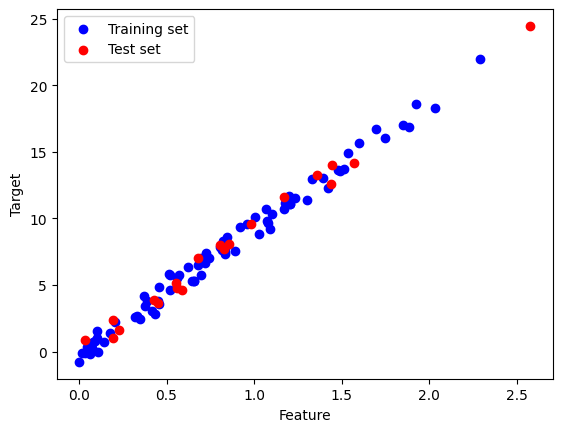

In [2]:
df = pd.read_csv(r'/kaggle/input/single-feature-linear-regression-dataset/Data.csv')

X = df['Feature']
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X_train, y_train, c='blue', label='Training set')
plt.scatter(X_test, y_test, c='red', label = 'Test set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Linear Regression from scratch

In [3]:
X_train

55    1.391583
88    0.088912
26    0.433386
42    1.694234
69    0.655050
        ...   
60    1.333188
71    0.377507
14    1.090145
92    0.175967
51    0.562092
Name: Feature, Length: 80, dtype: float64

In [4]:
class ScratchLinearRegression:
    def CostFun(self, w, b, data):
        m = len(data)
        TotalCost = 0
        for (index, row) in data.iterrows():
            x = row['Feature']
            y = row['Target']
            cost = (y - (w * x + b))**2
            TotalCost += cost
        TotalCost /= 2 * m
        return TotalCost

    def GradientDescent(self, w, b, data, L=0.1):
        m = len(data)
        w_gradient = 0
        b_gradient = 0
        for (index, row) in data.iterrows():
            x = row['Feature']
            y = row['Target']
            w_gradient += ((w * x + b) - y) * x
            b_gradient += ((w * x + b) - y)
        w_gradient *= L / m
        b_gradient *= L / m
        w -= w_gradient
        b -= b_gradient
        return w, b
    def Predict(self, X, w, b):
        return np.dot(X, w) + b
        
    def MSE(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

In [5]:
LR = ScratchLinearRegression()

w = 0
b = 0

for i in range(10000):
    w, b = LR.GradientDescent(w, b, pd.concat([X_train, y_train], axis=1))
    
train_pred = LR.Predict(X_train, w, b)
test_pred = LR.Predict(X_test, w, b)

Train Mean Squared Error: 0.3083270938718681


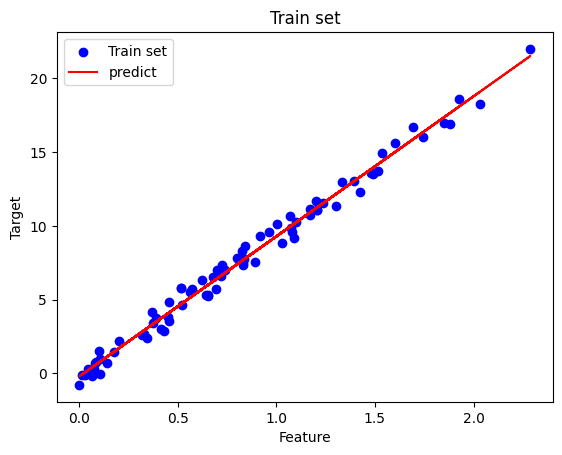

In [6]:
print(f'Train Mean Squared Error: {LR.MSE(y_train, train_pred)}')

plt.scatter(X_train, y_train, c='blue', label='Train set')
plt.plot(X_train, train_pred, c='red', label='predict')
plt.title('Train set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

Test Mean Squared Error: 0.29814647552576823


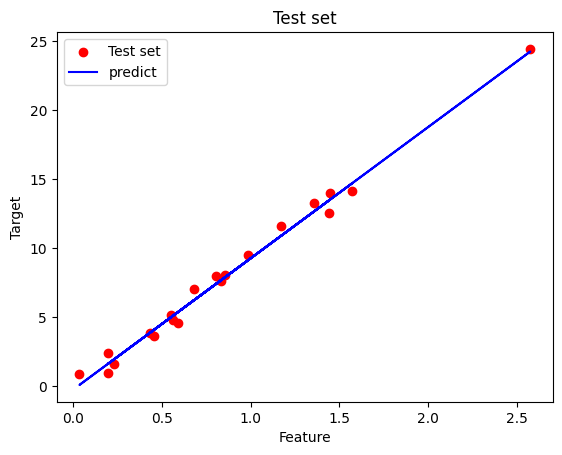

In [7]:
print(f'Test Mean Squared Error: {LR.MSE(y_test, test_pred)}')
plt.scatter(X_test, y_test, c='red', label='Test set')
plt.plot(X_test, test_pred, c='blue', label='predict')
plt.title('Test set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Linear Regression using sklearn

In [8]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [9]:
LR = LinearRegression()

LR.fit(X_train, y_train)  # Train the model on data

LR.coef_, LR.intercept_  # view the slope and y-intercept

(array([[9.49775162]]), array([-0.21477974]))

In [10]:
# Train the model
LR = LinearRegression()
LR.fit(X_train, y_train)

# Get coefficients and intercept
coef = LR.coef_
intercept = LR.intercept_

train_pred = LR.predict(X_train)
test_pred = LR.predict(X_test)


Train Mean Squared Error: 0.30832709387186796


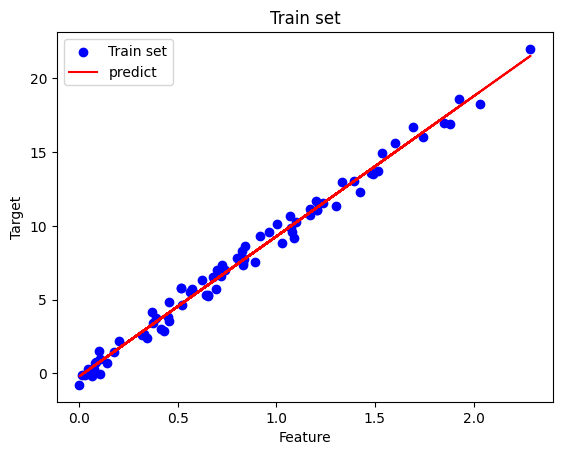

In [11]:
print(f'Train Mean Squared Error: {mean_squared_error(y_train, train_pred)}')

plt.scatter(X_train, y_train, c='blue', label='Train set')
plt.plot(X_train, train_pred, c='red', label='predict')
plt.title('Train set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

Test Mean Squared Error: 0.2981464755257683


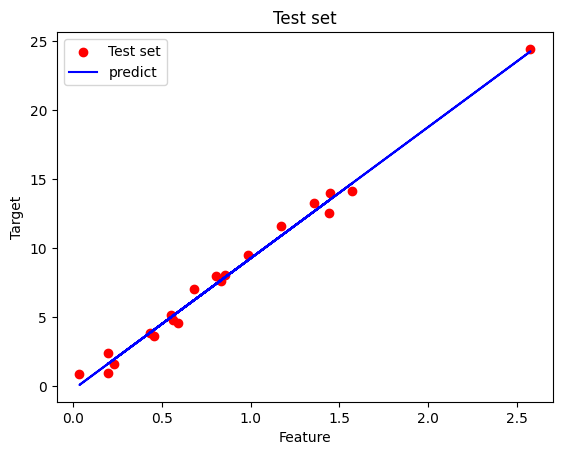

In [12]:
print(f'Test Mean Squared Error: {mean_squared_error(y_test, test_pred)}')
plt.scatter(X_test, y_test, c='red', label='Test set')
plt.plot(X_test, test_pred, c='blue', label='predict')
plt.title('Test set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()